In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [37]:
df = pd.read_csv('Energy_consumption.csv')
df.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          1000 non-null   int64  
 5   HVACUsage          1000 non-null   object 
 6   LightingUsage      1000 non-null   object 
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   object 
 9   Holiday            1000 non-null   object 
 10  EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB


In [39]:
# Convert Timestamp to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Convert categorical variables to numerical values
df['HVACUsage'] = df['HVACUsage'].map({'On': 1, 'Off': 0})
df['LightingUsage'] = df['LightingUsage'].map({'On': 1, 'Off': 0})
df['Holiday'] = df['Holiday'].map({'Yes': 1, 'No': 0})

# One-hot encode DayOfWeek
df = pd.get_dummies(df, columns=['DayOfWeek'], drop_first=True)

# Remove duplicates if any
df = df.drop_duplicates()

# Check for any missing values after conversion
missing_values = df.isnull().sum()

# Display the cleaned dataset info and missing values
df.info(), missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Timestamp            1000 non-null   datetime64[ns]
 1   Temperature          1000 non-null   float64       
 2   Humidity             1000 non-null   float64       
 3   SquareFootage        1000 non-null   float64       
 4   Occupancy            1000 non-null   int64         
 5   HVACUsage            1000 non-null   int64         
 6   LightingUsage        1000 non-null   int64         
 7   RenewableEnergy      1000 non-null   float64       
 8   Holiday              1000 non-null   int64         
 9   EnergyConsumption    1000 non-null   float64       
 10  DayOfWeek_Monday     1000 non-null   bool          
 11  DayOfWeek_Saturday   1000 non-null   bool          
 12  DayOfWeek_Sunday     1000 non-null   bool          
 13  DayOfWeek_Thursday   1000 non-null

(None,
 Timestamp              0
 Temperature            0
 Humidity               0
 SquareFootage          0
 Occupancy              0
 HVACUsage              0
 LightingUsage          0
 RenewableEnergy        0
 Holiday                0
 EnergyConsumption      0
 DayOfWeek_Monday       0
 DayOfWeek_Saturday     0
 DayOfWeek_Sunday       0
 DayOfWeek_Thursday     0
 DayOfWeek_Tuesday      0
 DayOfWeek_Wednesday    0
 dtype: int64)

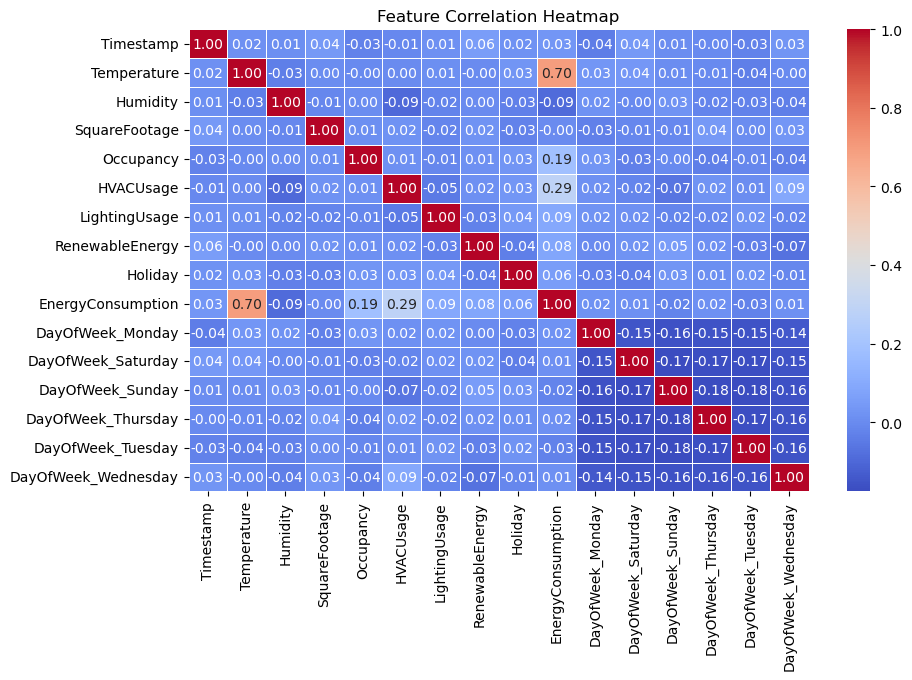

EnergyConsumption      1.000000
Temperature            0.696410
HVACUsage              0.286464
Occupancy              0.186580
LightingUsage          0.093423
RenewableEnergy        0.081160
Holiday                0.056676
Timestamp              0.034407
DayOfWeek_Monday       0.018071
DayOfWeek_Thursday     0.015772
DayOfWeek_Wednesday    0.014190
DayOfWeek_Saturday     0.013321
SquareFootage         -0.001129
DayOfWeek_Sunday      -0.021094
DayOfWeek_Tuesday     -0.026798
Humidity              -0.093583
Name: EnergyConsumption, dtype: float64

In [40]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Correlation with the target variable (EnergyConsumption)
target_correlation = correlation_matrix["EnergyConsumption"].sort_values(ascending=False)

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Display correlation of features with the target variable
target_correlation

In [41]:
# Drop DayOfWeek columns
df_cleaned = df.drop(columns=[col for col in df.columns if "DayOfWeek" in col])

In [44]:
# Define features and target variable
X = df_cleaned.drop(columns=["EnergyConsumption", "Timestamp"])
y = df_cleaned["EnergyConsumption"]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "SVM": SVR()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    if name == "SVM":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Mean Absolute Percentage Error

    # Store results
    results[name] = {
        "Mean Absolute Error (MAE)": mae,
        "Mean Squared Error (MSE)": mse,
        "Root Mean Squared Error (RMSE)": rmse,
        "R² Score": r2,
        "Mean Absolute Percentage Error (MAPE)": mape
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

                   Mean Absolute Error (MAE)  Mean Squared Error (MSE)  \
Linear Regression                   4.107281                 26.294649   
Random Forest                       4.406870                 30.150980   
Gradient Boosting                   4.461984                 30.899993   
AdaBoost                            4.521564                 32.058949   
XGBoost                             4.818027                 35.756154   
SVM                                 4.373797                 29.464046   

                   Root Mean Squared Error (RMSE)  R² Score  \
Linear Regression                        5.127831  0.598554   
Random Forest                            5.490991  0.539679   
Gradient Boosting                        5.558776  0.528243   
AdaBoost                                 5.662062  0.510549   
XGBoost                                  5.979645  0.454103   
SVM                                      5.428079  0.550166   

                   Mean Absolute Percen

<Figure size 1200x600 with 0 Axes>

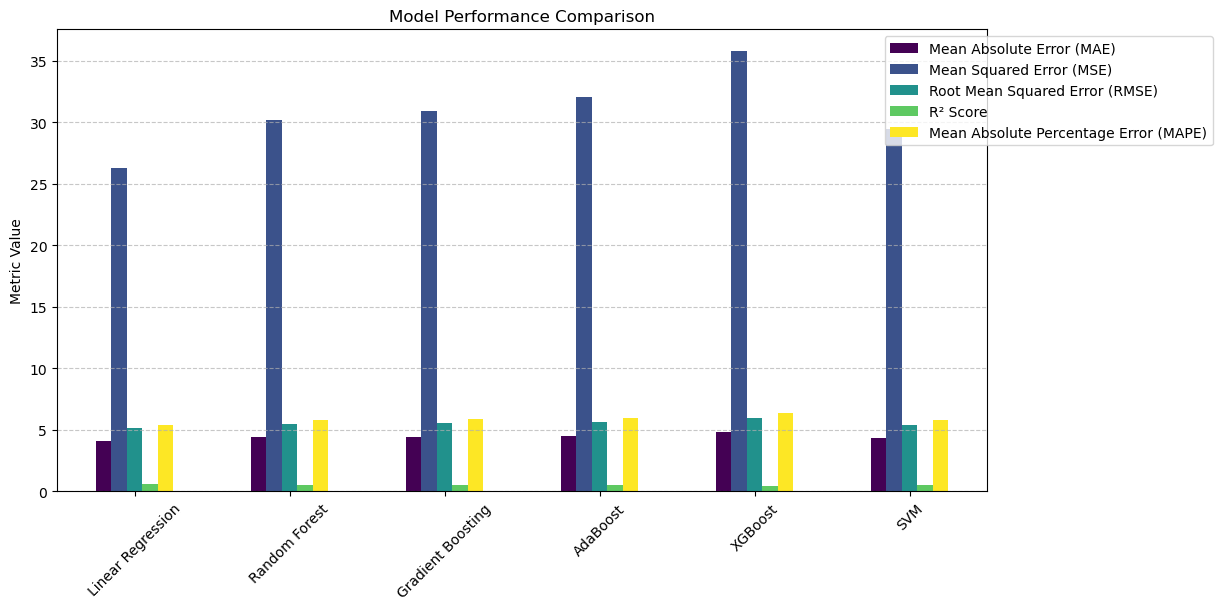

In [46]:
# Plot all performance metrics in a single grouped bar chart
plt.figure(figsize=(12, 6))
results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title("Model Performance Comparison")
plt.ylabel("Metric Value")
plt.xticks(rotation=45)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()